This notebook is based closely on demo_dataset.ipynb and demo_dissimilarities.ipynb from the RSA toolbox.


In [1]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset object
import rsatoolbox.rdm  as rsr # abbreviation to deal with RDM object
%matplotlib inline

# 1. Dataset objects in rsatoolbox

First we will see how to load and structure an rsatoolox `dataset` object.

## Single-subject dataset example

### Loading data

We will use a dataset where one subject was presented with 92 different visual stimuli while brain responses were measured in 100 voxels.
The different visual stimuli (each row) are the conditions, and the voxels (each column) are the measurement channels.

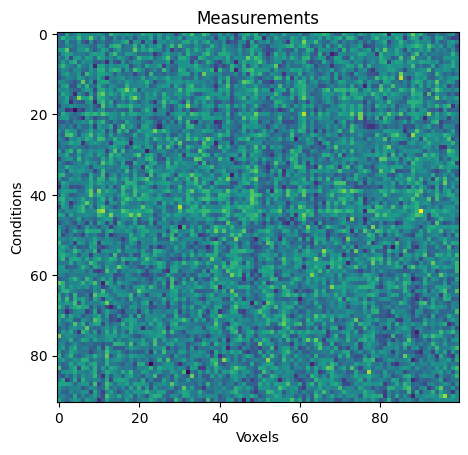

In [2]:
# import the measurements for the dataset
measurements = io.matlab.loadmat('rsatoolbox_demos_2025/92imageData/simTruePatterns.mat')
measurements = measurements['simTruePatterns2'] # a numpy array
nCond = measurements.shape[0]
nVox  = measurements.shape[1]

# plot the imported data
plt.imshow(measurements); 
plt.xlabel('Voxels');
plt.ylabel('Conditions');
plt.title('Measurements');

### Creating the dataset object

We will now arrange the loaded data into a dataset object for use in rsatoolbox.

A dataset object contains all the information needed to calculate a representational dissimilarity matrix (RDM). Therefore, the dataest *must* include:
 - measurements: [NxP] numpy.ndarray. These are the observations (N) from each measurement channel (P).
 - obs_descriptors: dict that defines the condition label associated with each observation in measurements

Because we also want to include helpful information about this dataset, we include the additional *optional* information:
 - descriptors: dict with metadata about this dataset object (e.g. experiment session #, subject #, experiment name).
 - channel_descriptors: dict that identifies each column (channel) in measurements

To start, we will note the session # (e.g. the first scanning session) and the subject # for this dataset. In addition, we will create labels for each of the 92 conditions and 100 voxels. Finally, we package this information into an rsatoolbox dataset object.

In [3]:
# create descriptors
des     = {'session': 1, 'subj': 1}
obs_des = {'conds':  np.array(['cond_'  + str(x) for x in np.arange(nCond)])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nVox)])}

# create dataset object
data = rsd.Dataset(measurements = measurements,
                    descriptors = des,
                    obs_descriptors = obs_des,
                    channel_descriptors = chn_des)
print(data)

rsatoolbox.data.Dataset
measurements = 
[[3.15028074 2.81436569 5.50254149 3.56818131 4.44391932 5.57255212
  4.82602424 4.62571467 4.52374579 4.50429674 4.92000832 4.44438595
  2.9687305  6.23119849 4.95307623 4.80064856 4.66187397 5.20244026
  4.84776701 3.87547417 4.41242303 5.80059575 5.01407387 5.51958059
  3.95350561 5.39595852 3.93796539 4.62997921 4.44637667 2.50944188
  3.84204105 5.6105602  4.87087731 6.54508598 4.40567642 4.42604395
  6.40517297 5.53374749 3.59266489 3.41813421 5.17379327 3.58925612
  4.85512648 4.07439641 2.23028934 4.49121776 5.41753849 5.78583504
  4.71740625 6.09451871 3.66779782 4.74567332 3.60151785 4.91271541
  4.3282412  3.85543964 5.6598938  4.28420325 3.93643302 3.88625922
  4.75788107 2.97409014 3.62091006 4.89380134 5.31831989 5.22983107
  6.16164406 5.60119774 4.31663162 3.40276414 3.29279266 5.77997384
  4.92759023 4.58720051 3.69647568 5.37645393 4.45349665 3.90523312
  5.40112521 4.95694207 5.38916879 5.94555222 1.51302177 5.38445252
  4.8047

### Subsetting and splitting

Sometimes we wish to consider only a subset of data - either a subset of observations (conditions), or subset of measurement channels.  This might be to only consider the measurement channels where all the subjects have data, or conditions which occur across all subjects/sessions. We can use `dataset` function to subset the datasets according to a subset of the conditions or channels, via `subset_obs` and `subset_channel`, respectively.

In [4]:
# select a subset of the dataset: select data only from voxels 1 to 3
sub_data = data.subset_channel(by='voxels', value=['voxel_1','voxel_2','voxel_3'])
print(sub_data)

rsatoolbox.data.Dataset
measurements = 
[[2.81436569 5.50254149 3.56818131]
 [5.96894291 5.15549385 4.63117642]
 [3.23478749 5.41662371 3.58799004]
 [3.54531851 4.66576373 4.30858046]
 [5.26415099 6.87735156 3.36134005]]
...

descriptors: 
session = 1
subj = 1


obs_descriptors: 
conds = ['cond_0' 'cond_1' 'cond_2' 'cond_3' 'cond_4' 'cond_5' 'cond_6' 'cond_7'
 'cond_8' 'cond_9' 'cond_10' 'cond_11' 'cond_12' 'cond_13' 'cond_14'
 'cond_15' 'cond_16' 'cond_17' 'cond_18' 'cond_19' 'cond_20' 'cond_21'
 'cond_22' 'cond_23' 'cond_24' 'cond_25' 'cond_26' 'cond_27' 'cond_28'
 'cond_29' 'cond_30' 'cond_31' 'cond_32' 'cond_33' 'cond_34' 'cond_35'
 'cond_36' 'cond_37' 'cond_38' 'cond_39' 'cond_40' 'cond_41' 'cond_42'
 'cond_43' 'cond_44' 'cond_45' 'cond_46' 'cond_47' 'cond_48' 'cond_49'
 'cond_50' 'cond_51' 'cond_52' 'cond_53' 'cond_54' 'cond_55' 'cond_56'
 'cond_57' 'cond_58' 'cond_59' 'cond_60' 'cond_61' 'cond_62' 'cond_63'
 'cond_64' 'cond_65' 'cond_66' 'cond_67' 'cond_68' 'cond_69' 'cond_70'
 

In [5]:
# select a further subset of the dataset: select data only from conditions 0 & 1
sub_data = sub_data.subset_obs(by='conds', value=['cond_0','cond_1'])
print(sub_data)

rsatoolbox.data.Dataset
measurements = 
[[2.81436569 5.50254149 3.56818131]
 [5.96894291 5.15549385 4.63117642]]
...

descriptors: 
session = 1
subj = 1


obs_descriptors: 
conds = ['cond_0', 'cond_1']


channel_descriptors: 
voxels = ['voxel_1', 'voxel_2', 'voxel_3']




Additionally, you might want to split the data in a certain way and analyze the splits as separate datasets. For instance, if your data is organized such that there are different ROIs, you might wish to perform the subsequent analyses separately for each ROI. Similarly, you could split the observations. This is supported with `split_obs` and `split_channel` options on the dataset object.

In [6]:
# Create some random data, then split by channels
nROI       = 3 
nVoxPerROI = 10 # three ROIs, each with 10 voxels
nObs       = 4

randomData = rsd.Dataset(measurements = np.random.rand(nObs, nROI * nVoxPerROI),
                          descriptors = {'session': 1, 'subj': 1},
                      obs_descriptors = {'conds'  : ['0', '1', '2', '3']},
                  channel_descriptors = {'ROIs'   : ['ROI1', 'ROI2', 'ROI3'] * nVoxPerROI} )
split_data = randomData.split_channel(by = 'ROIs') # Returns a list of datasets
print(split_data)

[rsatoolbox.data.Dataset(
measurements = 
[[8.37369964e-01 1.55704084e-01 4.52203100e-01 8.63806350e-01
  1.38525565e-01 9.63614816e-01 5.27028319e-01 4.18834420e-01
  9.21895008e-05 1.51773281e-01]
 [8.18925829e-01 2.01913133e-01 6.99370250e-01 7.62304604e-01
  5.63372960e-01 1.63108160e-01 4.67291611e-01 6.03173650e-01
  9.29670962e-01 5.05454911e-01]
 [6.69465635e-01 4.50263048e-01 1.90017262e-01 8.72997680e-01
  5.00808174e-01 1.97664858e-01 6.61048707e-01 5.87045762e-01
  1.51065614e-01 3.35258349e-01]
 [7.78293351e-01 8.92547429e-01 5.86868481e-01 2.63656061e-01
  2.79479017e-01 1.54242941e-01 6.48994252e-01 1.13379309e-01
  1.71026336e-01 9.26754008e-01]]
descriptors = 
{'session': 1, 'subj': 1, 'ROIs': 'ROI1'}
obs_descriptors = 
{'conds': ['0', '1', '2', '3']}
channel_descriptors = 
{'ROIs': ['ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1']}
, rsatoolbox.data.Dataset(
measurements = 
[[0.47731473 0.73093962 0.38155685 0.99933224 0.10307137 0.07232

# 2. Estimating dissimilarities

Now we will estimate Representational Dissimilarity Matricies (RDMs) from one or more datasets.

We will use simulated data for the 92 image dataset, which we loaded at the beginning.

### Calculating our first RDM
The main function to calculate RDMs from data is `rsatoolbox.rdm.calc_rdm`, to which we have abbreviated access as `rsr.calc_rdm` here. The function takes a dataset object as its main input. Additionally, we here pass the descriptor 'conds' to specify that we want to create a RDM of dissimilarities between conditions as specified by 'conds'. If this input is not provided, the RDM is calculated assuming that each row is a separate pattern/condition. To avoid confusion, we generally recommend to pass the `descriptor` argument.

In [7]:
# calculate a RDM
RDM_seuc = rsr.calc_rdm(data, descriptor = 'conds')
print(RDM_seuc)

rsatoolbox.rdm.RDMs
1 RDM(s) over 92 conditions

dissimilarity_measure = 
squared euclidean

dissimilarities[0] = 
[[0.         1.79168033 1.77301954 ... 1.7751112  2.34306615 2.37794181]
 [1.79168033 0.         1.76197146 ... 1.72826209 2.28580169 2.32155829]
 [1.77301954 1.76197146 0.         ... 1.84378466 2.36241197 2.29955556]
 ...
 [1.7751112  1.72826209 1.84378466 ... 0.         2.26406848 2.34601457]
 [2.34306615 2.28580169 2.36241197 ... 2.26406848 0.         1.78983719]
 [2.37794181 2.32155829 2.29955556 ... 2.34601457 1.78983719 0.        ]]

descriptors: 

rdm_descriptors: 
session = [1]
subj = [1]
index = [0]

pattern_descriptors: 
conds = ['cond_0', 'cond_1', 'cond_10', 'cond_11', 'cond_12', 'cond_13', 'cond_14', 'cond_15', 'cond_16', 'cond_17', 'cond_18', 'cond_19', 'cond_2', 'cond_20', 'cond_21', 'cond_22', 'cond_23', 'cond_24', 'cond_25', 'cond_26', 'cond_27', 'cond_28', 'cond_29', 'cond_3', 'cond_30', 'cond_31', 'cond_32', 'cond_33', 'cond_34', 'cond_35', 'cond_36', '

As you see, the RDMs object can be printed for easy inspection.
The calculated dissimilarities are displayed as a square symmetric matrix, but stored as a vector of strung-out upper-triangular elements. Note also that the RDM object inherits the descriptors from the dataset object.

By default, `calc_rdm` computes squared euclidean distances between mean patterns. If we want to compute a different type of RDM, we can do so by passing the `method` parameter. See https://rsatoolbox.readthedocs.io/en/stable/distances.html for a discussion of different methods for calculating RDMs.
For example, we can calculate correlation distances like this:

In [8]:
RDM_corr = rsr.calc_rdm(data, method = 'correlation', descriptor = 'conds')
print(RDM_corr)

rsatoolbox.rdm.RDMs
1 RDM(s) over 92 conditions

dissimilarity_measure = 
correlation

dissimilarities[0] = 
[[0.         0.89480647 0.83906726 ... 0.88746515 1.17020289 1.13428357]
 [0.89480647 0.         0.8465154  ... 0.86239533 1.14288218 1.12009542]
 [0.83906726 0.8465154  0.         ... 0.87021622 1.14832133 1.14952049]
 ...
 [0.88746515 0.86239533 0.87021622 ... 0.         1.12991985 1.11378125]
 [1.17020289 1.14288218 1.14832133 ... 1.12991985 0.         0.85595915]
 [1.13428357 1.12009542 1.14952049 ... 1.11378125 0.85595915 0.        ]]

descriptors: 

rdm_descriptors: 
session = [1]
subj = [1]
index = [0]

pattern_descriptors: 
conds = ['cond_0', 'cond_1', 'cond_10', 'cond_11', 'cond_12', 'cond_13', 'cond_14', 'cond_15', 'cond_16', 'cond_17', 'cond_18', 'cond_19', 'cond_2', 'cond_20', 'cond_21', 'cond_22', 'cond_23', 'cond_24', 'cond_25', 'cond_26', 'cond_27', 'cond_28', 'cond_29', 'cond_3', 'cond_30', 'cond_31', 'cond_32', 'cond_33', 'cond_34', 'cond_35', 'cond_36', 'cond_3

For the Euclidean and Mahalanobis distances there are squared and non-squared variants, which are both used sometimes. By default, rsatoolbox calculates the *squared* dissimilarities. To compute non-squared distances, use the `sqrt_transform` function in rsatoolbox.rdm:

In [9]:
RDM_seuc = rsr.calc_rdm(data, method='euclidean', descriptor='conds')
print(RDM_seuc.dissimilarity_measure)

RDM_euc = rsatoolbox.rdm.sqrt_transform(RDM_seuc)
print(RDM_euc.dissimilarity_measure)

squared euclidean
euclidean


### Accessing RDM contents
To access the dissimilarities saved in the rdms object, use the `get_matrices` and `get_vectors` functions. These functions always have a starting dimension for multiple rdms as the rdms object can store multiple rdms.

In [10]:
dist_vectors = RDM_euc.get_vectors() # here a vector
dist_matrix  = RDM_euc.get_matrices()
print(dist_matrix)
print('\nShape of square RDM: ', dist_matrix.shape)
print('\nShape of upper triangular vector: ', dist_vectors.shape)

[[[0.         1.33853664 1.3315478  ... 1.33233299 1.53070773 1.54205765]
  [1.33853664 0.         1.32739273 ... 1.31463382 1.5118868  1.52366607]
  [1.3315478  1.32739273 0.         ... 1.35786032 1.53701398 1.51642855]
  ...
  [1.33233299 1.31463382 1.35786032 ... 0.         1.50468219 1.53167052]
  [1.53070773 1.5118868  1.53701398 ... 1.50468219 0.         1.33784797]
  [1.54205765 1.52366607 1.51642855 ... 1.53167052 1.33784797 0.        ]]]

Shape of square RDM:  (1, 92, 92)

Shape of upper triangular vector:  (1, 4186)


\
For a quick look, we can plot the RDM using `rsatoolbox.vis.show_rdm`:

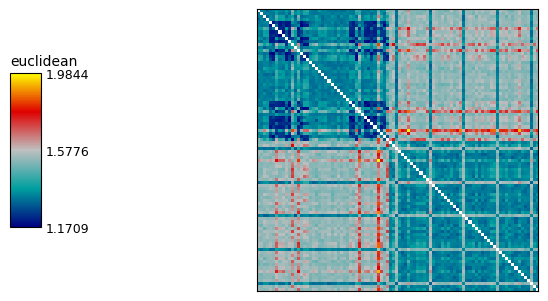

In [11]:
fig, ax, ret_val = rsatoolbox.vis.show_rdm(RDM_euc, 
                                           cmap = 'classic', 
                                           show_colorbar = 'figure',
                                           figsize = (8,8));

If you already calculated a RDM in some different way, you can turn your RDM into an RDM object for use in rsatoolbox by using the constructor `rsatoolbox.rdm.RDMs`. If you want to use descriptors for the conditions or rdms, you need to specify them as dictionaries of lists as for the dataset object.

The following thus creates a naked RDMs object, which only contains the dissimilarities and no specific descriptors.

rsatoolbox.rdm.RDMs
1 RDM(s) over 92 conditions

dissimilarity_measure = 
None

dissimilarities[0] = 
[[0.         1.33853664 1.3315478  ... 1.33233299 1.53070773 1.54205765]
 [1.33853664 0.         1.32739273 ... 1.31463382 1.5118868  1.52366607]
 [1.3315478  1.32739273 0.         ... 1.35786032 1.53701398 1.51642855]
 ...
 [1.33233299 1.31463382 1.35786032 ... 0.         1.50468219 1.53167052]
 [1.53070773 1.5118868  1.53701398 ... 1.50468219 0.         1.33784797]
 [1.54205765 1.52366607 1.51642855 ... 1.53167052 1.33784797 0.        ]]

descriptors: 

rdm_descriptors: 
index = [0]

pattern_descriptors: 
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]




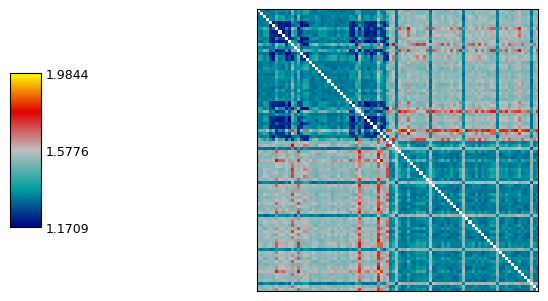

In [12]:
# create an RDM object with given entries:
RDM_euc_manual = rsr.RDMs(dist_vectors)
fig, ax, ret_val = rsatoolbox.vis.show_rdm(RDM_euc_manual, 
                                           cmap = 'classic', 
                                           show_colorbar = 'figure',
                                           figsize = (8,8));
print(RDM_euc_manual)

## Create an RDM object for several RDMs
When we have multiple datasets, we can compute the RDMs for each by simply passing a list of datasets to the function. This is convenient when we want to compute RDMs for multiple subjects, conditions, brain areas, etc.

To illustrate, let's start by creating a list of 5 datasets with noisy copies of the measurements we already have, labeling them as coming from different subjects in the descriptor `'subj'`:

In [13]:
data_list = []
for i in range(5):
    m_noisy = measurements + np.random.randn(*measurements.shape)
    des = {'session': 1, 'subj': i}
    data_list.append(rsd.Dataset(measurements = m_noisy,
                                  descriptors = des,
                              obs_descriptors = obs_des,
                          channel_descriptors = chn_des))

We can now calculate the RDMs for all subjects in one go:

In [14]:
rdms = rsr.calc_rdm(data_list)

\
Note that `rdms` is a single object, which contains all RDMs. The functions for accessing the vector representation and the matrix representation are still available. Additionally, the number of RDMs and the descriptors we gave to the dataset objects are kept:

In [15]:
print('The number of RDMs is:', rdms.n_rdm)

print('The shape of the RDM array is:', rdms.dissimilarities.shape)

print('\nThe descriptors for the RDMs are:\n', rdms.rdm_descriptors)

print('\nThe patterns or conditions are still described:\n')
print(rdms.pattern_descriptors['conds'])

The number of RDMs is: 5
The shape of the RDM array is: (5, 4186)

The descriptors for the RDMs are:
 {'session': [1, 1, 1, 1, 1], 'subj': [0, 1, 2, 3, 4], 'index': [0, 1, 2, 3, 4]}

The patterns or conditions are still described:

['cond_0' 'cond_1' 'cond_2' 'cond_3' 'cond_4' 'cond_5' 'cond_6' 'cond_7'
 'cond_8' 'cond_9' 'cond_10' 'cond_11' 'cond_12' 'cond_13' 'cond_14'
 'cond_15' 'cond_16' 'cond_17' 'cond_18' 'cond_19' 'cond_20' 'cond_21'
 'cond_22' 'cond_23' 'cond_24' 'cond_25' 'cond_26' 'cond_27' 'cond_28'
 'cond_29' 'cond_30' 'cond_31' 'cond_32' 'cond_33' 'cond_34' 'cond_35'
 'cond_36' 'cond_37' 'cond_38' 'cond_39' 'cond_40' 'cond_41' 'cond_42'
 'cond_43' 'cond_44' 'cond_45' 'cond_46' 'cond_47' 'cond_48' 'cond_49'
 'cond_50' 'cond_51' 'cond_52' 'cond_53' 'cond_54' 'cond_55' 'cond_56'
 'cond_57' 'cond_58' 'cond_59' 'cond_60' 'cond_61' 'cond_62' 'cond_63'
 'cond_64' 'cond_65' 'cond_66' 'cond_67' 'cond_68' 'cond_69' 'cond_70'
 'cond_71' 'cond_72' 'cond_73' 'cond_74' 'cond_75' 'cond_7

## Accessing parts of the rdms object
To access only a subset of the rdms in the object use the `subset` and `subsample` functions:
The inputs to these functions are a descriptor used for the selection and a list (or other iterable) of selected values.

The difference between the two function lies in how they treat repetitions. If you pass a value twice, subsample will repeat the rdm in the returned object, whereas subset will return every rdm at most once.

In [16]:
# same output:
r1 = rdms.subset(   'subj', [1, 3, 4])
r2 = rdms.subsample('subj', [1, 3, 4])
# different output:
r3 = rdms.subset(   'subj', [1, 3, 3, 4])
r4 = rdms.subsample('subj', [1, 3, 3, 4])
# r3 has 3 rdms;  r4 has 4 rdms

Equivalent syntax for selecting a subset of the patterns is implemented as `subset_pattern` and `subsample_pattern`. (For repeated patterns, subsample will fill in dissimilarities between patterns and themselves as `np.nan`.)

In [17]:
# same output:
r1 = rdms.subset_pattern(   'index', [1, 3, 4, 5, 6, 72])
r2 = rdms.subsample_pattern('index', [1, 3, 4, 5, 6, 72])
# different output:
r3 = rdms.subset_pattern(   'index', [1, 3, 3, 4, 5, 6, 72])
r4 = rdms.subsample_pattern('index', [1, 3, 3, 4, 5, 6, 72])
# r3 has 6 conditions;  r4 has 7 conditions

Indexing and iterating over RDMs is also supported, i.e. `rdms[0]` will return the first rdm and `for rdm in rdms:` are legal commands. These commands return copies though, i.e. `rdms[0]` and `rdm` will be copies of the corresponding rdms and changing them will not affect the original rdms object.

We can still show the RDMs in a plot using `rsatoolbox.vis.show_rdm`:

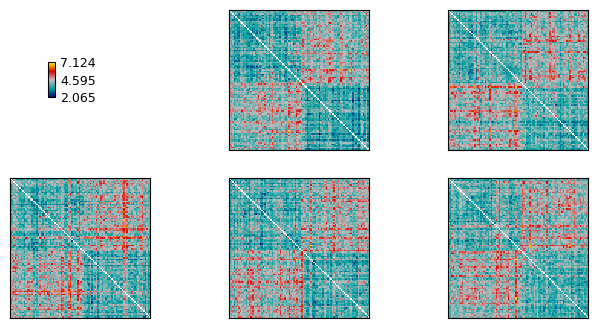

In [18]:
rsatoolbox.vis.show_rdm(rdms,
                        cmap = 'classic',
                        show_colorbar = 'figure',
                       figsize = (8,4));

## Crossvalidated dissimilarities
When we have multiple independent measurements of a pattern, we can use crossvalidated distances to achieve an unbiased estimate of the dissimilarities between patterns. Essentially, this is meant to counteract the upward bias caused by adding noise to the measurements. You may have noticed this bias by comparing the noisy RDMs we just created and the clean rdm we created at the beginning of this tutorial.

To illustrate how to do this using rsatoolbox, we first create a dataset with multiple (`n_rep`) measurements for each pattern:

In [19]:
n_rep   = 3
m_noisy = np.repeat(measurements, n_rep, axis=0)
m_noisy += np.random.randn(*m_noisy.shape)
    
conds = np.array(['cond_%02d' % x for x in np.arange(nCond)])
sessions = np.tile(np.arange(float(n_rep)), 92) # calc_rdm will accept string, float or integer, but give a warning for integers
conds = np.repeat(conds, n_rep)
obs_des = {'conds': conds, 'sessions': sessions}
des     = {'subj': 1}

dataset = rsd.Dataset(measurements = m_noisy,
                       descriptors = des,
                   obs_descriptors = obs_des,
               channel_descriptors = chn_des)

Importantly, we added a sessions label to the observations descriptor, which marks which measurement comes from which session. We can now compute the crossvalidated distances simply using the `'crossnobis'` rdm calculation method. To specify which measurements come from the same session we pass `'sessions'` as the `cv_descriptor`. 

In [20]:
rdm_cv = rsatoolbox.rdm.calc_rdm(dataset, method = 'crossnobis', descriptor = 'conds', cv_descriptor = 'sessions');
print(rdm_cv.dissimilarity_measure)

crossnobis


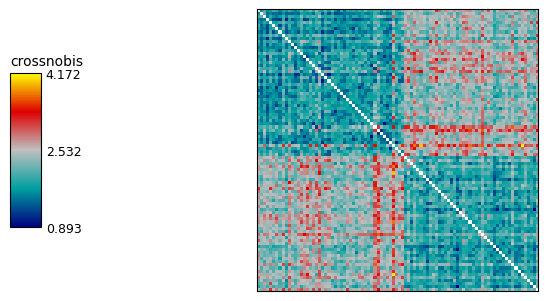

In [21]:
rsatoolbox.vis.show_rdm(rdm_cv, 
                        cmap = 'classic',
               show_colorbar = 'figure',
                     figsize = (8,8));

Looking at this RDM, we can see that this indeed removed the overall upward bias, although the RDM is still noisy of course.

If you have multiple datasets for multiple subjects this will still work fine with the crossnobis dissimilarity.

Note that, despite the dissimilarity being labelled as "crossnobis", it is actually a *cross-validated squared euclidean distance*, because we have not considered the noise covariance.

## Taking the noise covariance into account
It is possible to take into account the noise covariance to get a more reliable estimate of the RDM. For computational efficiency reasons, all functions which compute these dissimilarities in this toolbox take the precision matrix (the inverse of the covariance matrix) as input.

To do so, the first step is to estimate the noise precision matrix. There are multiple estimates implemented in rsatoolbox.


### Diagonal covariance from measurements = univariate noise normalization
The first one is computing the variances and using the diagonal precision matrix, which is equivalent to normalizing each channel separately.

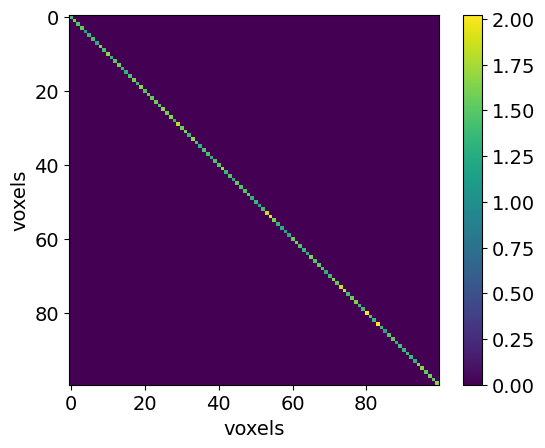

In [22]:
# the covariance matrix can be calculated, but is never used in rsatoolbox:
noise_cov_diag  = rsatoolbox.data.noise.cov_from_measurements( dataset, obs_desc = 'conds', method = 'diag')

# computing the precision matrix (inverse of CoV) instead:
noise_prec_diag = rsatoolbox.data.noise.prec_from_measurements(dataset, obs_desc = 'conds', method = 'diag')
plt.rcParams.update({'font.size': 14});
plt.imshow(noise_prec_diag), plt.colorbar();
plt.xlabel('voxels');
plt.ylabel('voxels');

### Shrinkage estimate from measurements = multivariate noise normalization
The second method for estimating the noise covariance is a shrinkage estimate, which mixes the diagonal matrix with the sample covariance to achieve an invertible, more accurate estimate of the covariance.

In rsatoolbox this is implemented in the same function, just changing the method parameter. There are two variants: `'shrinkage_eye'` implements a shrinkage towards a multiple of the identity matrix, `'shrinkage_diag'` shrinks towards the diagonal of the data covariance matrix.

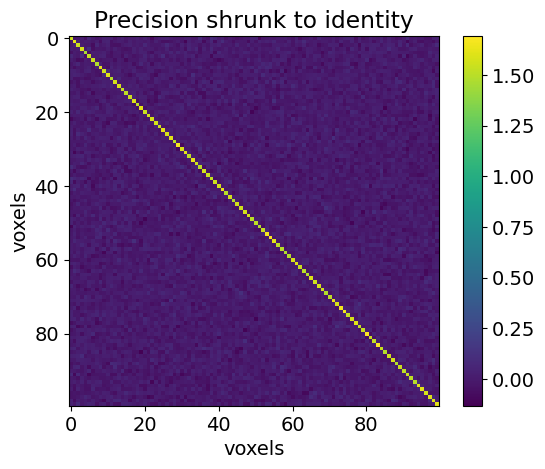

In [23]:
noise_prec_shrink_eye = rsatoolbox.data.noise.prec_from_measurements(dataset, obs_desc='conds', method='shrinkage_eye')
plt.imshow(noise_prec_shrink_eye), plt.colorbar();
plt.xlabel('voxels');
plt.ylabel('voxels');
plt.title('Precision shrunk to identity');

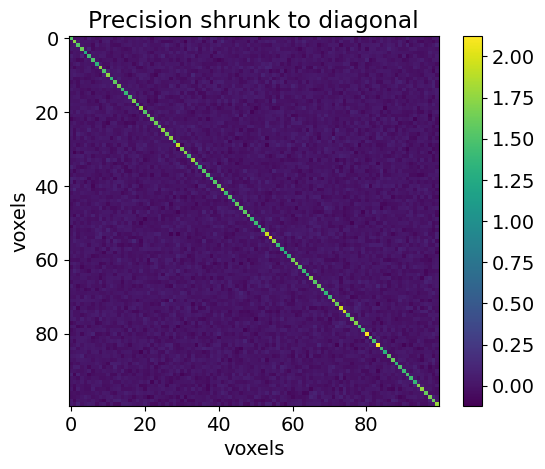

In [24]:
noise_prec_shrink_diag = rsatoolbox.data.noise.prec_from_measurements(dataset, obs_desc='conds', method='shrinkage_diag')
plt.imshow(noise_prec_shrink_diag), plt.colorbar();
plt.xlabel('voxels');
plt.ylabel('voxels');
plt.title('Precision shrunk to diagonal');

### Estimates based on residuals
A different source for the noise covariance can be measures from an earlier step in the analysis, which lead to the dataset object. Usually, these would be the residuals of a 1st level analysis to estimate the activations caused by the conditions or stimuli.

To use this source for the noise covariance, put the measurements you wish to use into a $n_{res}\times k$ matrix, where $k$ is the number of measurement channels and run the following commands from the noise handling in rsatoolbox:

In [25]:
residuals = np.random.randn(1000, dataset.n_channel) # obviously do not use random residuals for this in applications!
noise_prec_res = rsatoolbox.data.noise.prec_from_residuals(residuals)

`rsatoolbox.data.noise.prec_from_residuals` takes the same method argument as `prec_from_measurements` allowing for diagonal covariance and shrinkage estimates.

(Also there is a `dof` argument, which allows you to provide the degrees of freedom left in the residuals to correct the estimate for components removed via regression. This only scales the matrix, which means that this can be ignored if the absolute scale of the RDM does not matter to you.)

### Computing Mahalanobis distances
Mahalanobis distance is the simplest form of dissimilarity to take the covariance between measurement channels into account. This reweights channels with the estimate of the precision matrix.

In rsatoolbox, this is implemented as the `'mahalanobis'` method parameter of `calc_rdm`. The noise precision is passed as the `noise` parameter. For comparison we here also recompute the (squared) euclidean RDM on the original data:

In [26]:
rdm_seuc        = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='euclidean');
rdm_maha_diag   = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='mahalanobis', noise=noise_prec_diag);
rdm_maha_shrink = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='mahalanobis', noise=noise_prec_res);

To compare the three estimated rdms, we can plot them with the following code. In this case the differences are fairly small, because we added independent and equally sized noise to the measurements. When the measurement channels are correlated and/or differently noisy this will result in larger differences.

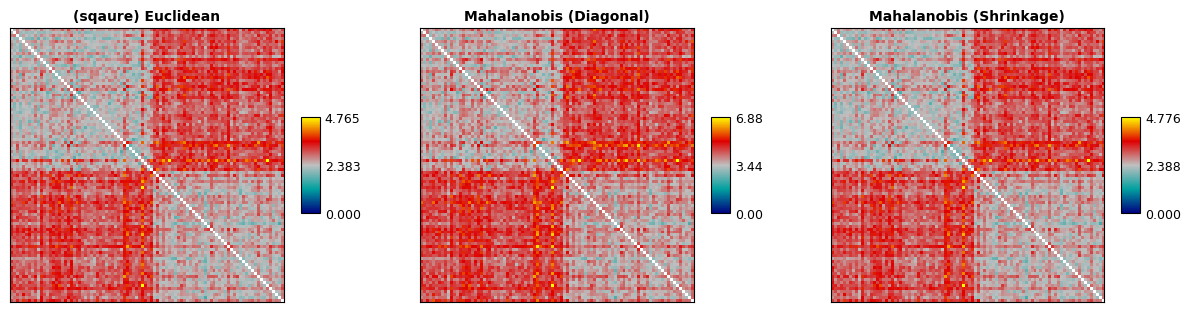

In [27]:
rsatoolbox.vis.show_rdm(
    rsatoolbox.rdm.RDMs(
        np.concatenate(
            [rdm_seuc.get_matrices(), 
             rdm_maha_diag.get_matrices(),
             rdm_maha_shrink.get_matrices()],
            axis=0),
        rdm_descriptors=dict(method=('(sqaure) Euclidean', 'Mahalanobis (Diagonal)', 'Mahalanobis (Shrinkage)'))
    ),
    show_colorbar ='panel', cmap='classic',
    rdm_descriptor='method',
    vmin=0,
    n_row=1,
    figsize=(15,5)
);

Taking the noise covariance into account can be combined with crossvalidated dissimilarities by computing cross-nobis dissimilarities. This is implemented as the `crossnobis` method of calculating RDMs in rsatoolbox:

In [28]:
rdm_cv_eye    = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='crossnobis', cv_descriptor='sessions');
rdm_cv_diag   = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='crossnobis', cv_descriptor='sessions', noise=noise_prec_diag);
rdm_cv_shrink = rsatoolbox.rdm.calc_rdm(dataset, descriptor='conds', method='crossnobis', cv_descriptor='sessions', noise=noise_prec_res);

/cognestic/miniconda3/envs/mri/lib/python3.11/site-packages/rsatoolbox/data/computations.py:36: RuntimeWarning: invalid value encountered in multiply
  average = np.nan * np.empty(


We can plot these matrices again:

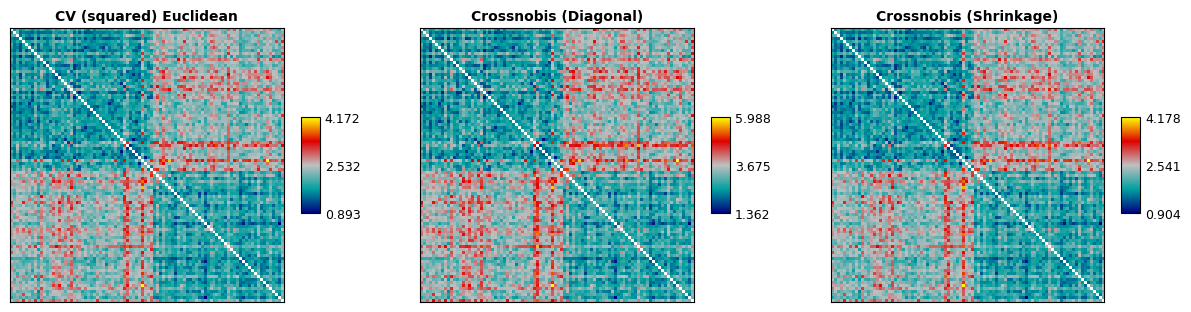

In [29]:
rsatoolbox.vis.show_rdm(
    rsatoolbox.rdm.RDMs(
        np.concatenate(
            [rdm_cv_eye.get_matrices(), 
             rdm_cv_diag.get_matrices(),
             rdm_cv_shrink.get_matrices()],
            axis=0),
        rdm_descriptors=dict(method=('CV (squared) Euclidean', 'Crossnobis (Diagonal)', 'Crossnobis (Shrinkage)'))
    ),
    show_colorbar='panel', cmap='classic',
    rdm_descriptor='method',
    n_row=1,
    figsize=(15,5)
);